<a href="https://colab.research.google.com/github/bemadi/Data-Viz-Practice/blob/main/(Practice)_Data_Viz_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
filename = '/content/drive/MyDrive/Data/KIB Cash Crops (1).xlsx'
df=pd.read_excel(filename)
df.head()

,text,Area harvested (km2),Gross Production (m tonnes),Yield per km2 (tonnes),$ per kilo,$ per tonne,Gross Production value ($bn) 2014,Value per km2 2014,Unnamed: 8,Unnamed: 9
0,Wheat1,2154895.0,671.0,311.384081,NaN,NaN,120.0,55687.16805,FAOSTAT,http://faostat3.fao.org/
1,Maize,1773795.0,872.0,491.601341,NaN,NaN,140.0,78926.82074,FAOSTAT,http://faostat3.fao.org/
2,Rice,1631991.0,720.0,441.178904,NaN,NaN,228.0,139706.65280,FAOSTAT,http://faostat3.fao.org/
3,Soybeans,1049973.0,242.0,230.482117,NaN,NaN,75.0,71430.40821,FAOSTAT,http://faostat3.fao.org/
4,Beans,536762.0,24.0,44.712554,NaN,NaN,16.0,29808.36944,FAOSTAT,http://faostat3.fao.org/


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   text                               21 non-null     object 
 1   Area harvested (km2)               21 non-null     float64
 2   Gross Production (m tonnes)        21 non-null     float64
 3   Yield per km2 (tonnes)             21 non-null     float64
 4   $ per kilo                         21 non-null     float64
 5   $ per tonne                        0 non-null      float64
 6   Gross Production value ($bn) 2014  21 non-null     float64
 7   Value per km2 2014                 21 non-null     float64
 8   Unnamed: 8                         21 non-null     object 
 9   Unnamed: 9                         21 non-null     object 
dtypes: float64(7), object(3)
memory usage: 1.8+ KB


Price per kilo and Price per tonne will be removed since they are blank.
Columns 'Unnamed 8' and 'Unnamed 9' will also be removed as they hold no useful information. 

In [ ]:
df=df.drop(columns=['$ per tonne', '$ per kilo', 'Unnamed: 8', 'Unnamed: 9'])

In [ ]:
df=df.rename(columns={'text': 'Crop'})

In [ ]:
# Change 'Wheat1' to 'Wheat'
df['Crop'].replace(to_replace='Wheat1', value='Wheat', inplace=True)

In [ ]:
df['Crop'].replace(to_replace='Vegetables (minor)', value='Minor Veg', inplace=True)

In [ ]:
df.head(21).round()

,Crop,Area harvested (km2),Gross Production (m tonnes),Yield per km2 (tonnes),Gross Production value ($bn) 2014,Value per km2 2014
0,Wheat,2154895.0,671.0,311.0,120.0,55687.0
1,Maize,1773795.0,872.0,492.0,140.0,78927.0
2,Rice,1631991.0,720.0,441.0,228.0,139707.0
3,Soybeans,1049973.0,242.0,230.0,75.0,71430.0
4,Beans,536762.0,24.0,45.0,16.0,29808.0
5,Barley,495260.0,133.0,269.0,18.0,36345.0
6,Rapeseed,340851.0,65.0,191.0,21.0,61610.0
7,Sugar Cane,260886.0,1833.0,7026.0,68.0,260650.0
8,Cassava,203852.0,263.0,1290.0,31.0,152071.0
9,Potatoes,192021.0,365.0,1901.0,70.0,364543.0


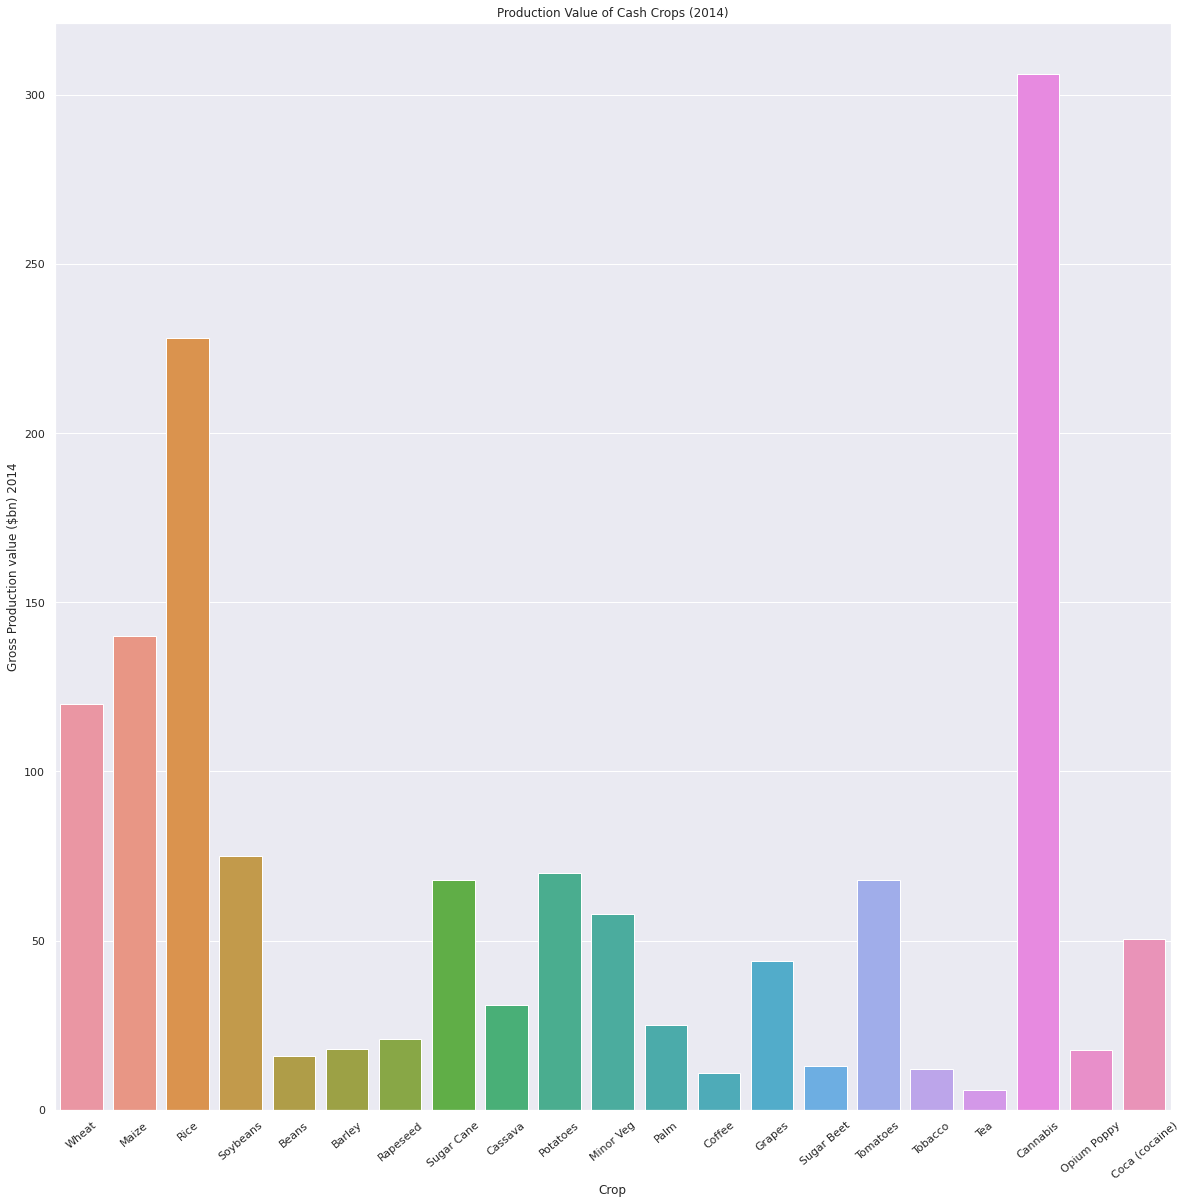

In [ ]:
sns.barplot(data=df, x='Crop', y='Gross Production value ($bn) 2014').set(title='Production Value of Cash Crops (2014)');
sns.set(rc={'figure.figsize':(20,20)})
plt.xticks(rotation=40);

Looks like cannabis was by far the most valuable industry in 2014. This makes sense, as Colorado legalized it in 2012, and more states soon followed. 